In [1]:
# Imports
import numpy as np
rng_seed = 399
np.random.seed(rng_seed)
from matplotlib import pyplot as plt
import sys
sys.path.append("..")

from sklearn.decomposition import PCA

from utils import get_model_checkpoint_filepaths

In [2]:
# Get last word embeddings from training
checkpoint_filepaths_dict = get_model_checkpoint_filepaths(
    output_dir="../output/word2vec_training/17-Oct-2020_01-00-56",
    model_name="word2vec",
    dataset_name="enwiki",
)
last_embedding_weights_filepath = checkpoint_filepaths_dict["intermediate_embedding_weight_filepaths"][-1]
last_embedding_weights = np.load(last_embedding_weights_filepath, mmap_mode="r").astype(np.float64)

In [3]:
# Load words
with open(checkpoint_filepaths_dict["train_words_filepath"], "r") as file:
    words = np.array(file.read().split("\n"))
word_to_int = {word: i for i, word in enumerate(words)}

In [4]:
# Get word vectors of countried and capitals
countries_to_capitals = [
    ("china", "beijing"),
    ("russia", "moscow"),
    ("japan", "tokyo"),
    ("turkey", "ankara"),
    ("poland", "warsaw"),
    ("germany", "berlin"),
    ("france", "paris"),
    ("italy", "rome"),
    ("greece", "athens"),
    ("spain", "madrid"),
    ("portugal", "lisbon")
]

In [5]:
# Create PCA embedding
last_embedding_weights_pca_2d = PCA(n_components=2).fit_transform(last_embedding_weights)

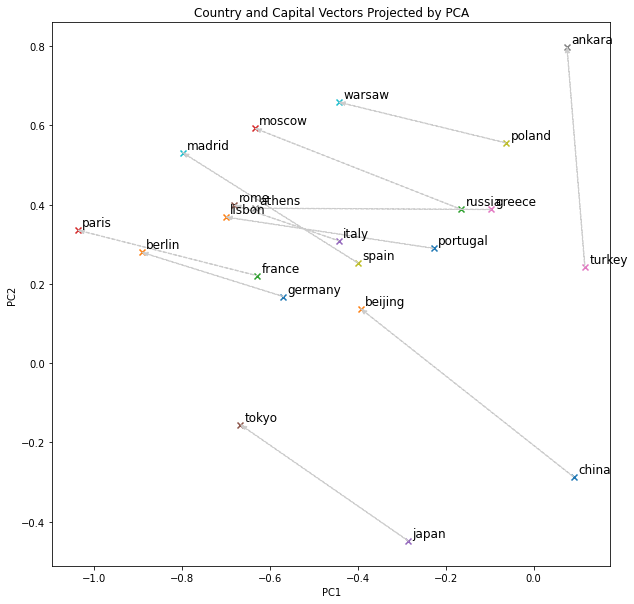

In [14]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
for country_word, capital_word in countries_to_capitals:
    country_vec = last_embedding_weights_pca_2d[word_to_int[country_word]]
    capital_vec = last_embedding_weights_pca_2d[word_to_int[capital_word]]
    
    plt.scatter(country_vec[0], country_vec[1], marker="x")
    plt.text(country_vec[0] + .01, country_vec[1] + .01, country_word, fontsize=12)
    
    plt.scatter(capital_vec[0], capital_vec[1], marker="x")
    plt.text(capital_vec[0] + .01, capital_vec[1] + .01, capital_word, fontsize=12)
    
    # Draw arrow
    ax.arrow(
        country_vec[0],
        country_vec[1],
        capital_vec[0] - country_vec[0],
        capital_vec[1] - country_vec[1],
        head_width=0.01,
        length_includes_head=True,
        ls="--",
        color="#ccc"
    )
plt.title("Country and Capital Vectors Projected by PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()